# Performance

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from eval import eval_mse
from data import dataset

In [37]:
um_train = dataset.load_sparse_matrix(file="../data/raw_ratings_train.npz")
rating_preds_train = dataset.load_dense_array(file="../data/dols_preds_train.npz")
rating_true_train = um_train.data
print("train_mse=", eval_mse.mse(rating_true_train, rating_preds_train))

um_valid = dataset.load_sparse_matrix(file="../data/raw_ratings_valid.npz")
rating_preds_valid = dataset.load_dense_array(file="../data/dols_preds_valid.npz")
rating_true_valid = um_valid.data
print("valid_mse=", eval_mse.mse(rating_true_valid, rating_preds_valid))

print("random_model_train_mse=", eval_mse.mse(np.mean(rating_true_train), rating_true_train))
print("random_model_valid_mse=", eval_mse.mse(np.mean(rating_true_train), rating_true_valid))

train_mse= 0.6488042814383275
valid_mse= 0.779551053228618
random_model_train_mse= 1.089445320675873
random_model_valid_mse= 1.0808221735504397


### Rating distribution

#### Training (ground truth)

num_data_points= 70585
mean= 3.5001700077920237


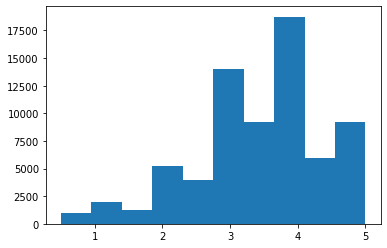

In [38]:
plt.hist(x=rating_true_train, bins=10)
print("num_data_points=", rating_true_train.shape[0])
print("mean=", np.mean(rating_true_train))

#### Training (prediction)

num_data_points= 70585
mean= 3.5133443


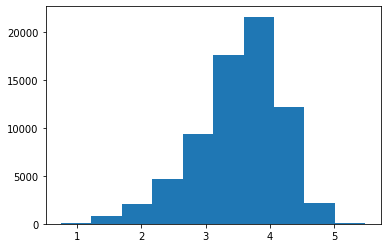

In [39]:
plt.hist(x=rating_preds_train, bins=10)
print("num_data_points=", rating_preds_train.shape[0])
print("mean=", np.mean(rating_preds_train))

#### Validation (ground truth)

num_data_points= 30251
mean= 3.5047932299758684


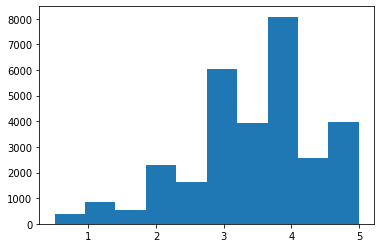

In [40]:
plt.hist(x=rating_true_valid, bins=10)
print("num_data_points=", rating_true_valid.shape[0])
print("mean=", np.mean(rating_true_valid))

#### Validation (prediction)

num_data_points= 30251
mean= 3.4617538


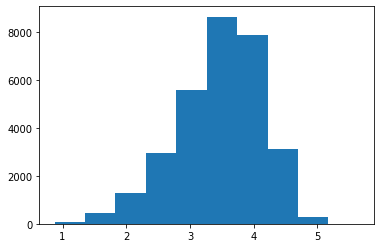

In [41]:
plt.hist(x=rating_preds_valid, bins=10)
print("num_data_points=", rating_preds_valid.shape[0])
print("mean=", np.mean(rating_preds_valid))

# Prediction plot

In [42]:
user_embed_table = dataset.load_dense_array(file="../data/latent_dnn_user.npz")
movie_embed_table = dataset.load_dense_array(file="../data/latent_dnn_movie.npz")

pairwise_input_train = np.concatenate((user_embed_table[um_train.row], movie_embed_table[um_train.col]), axis=1)

print("num_features=", pairwise_input_train.shape[1])

num_features= 23


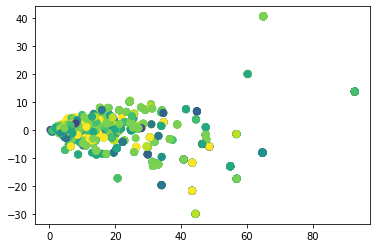

In [43]:
plt.scatter(x=pairwise_input_train[:1000, 0], y=pairwise_input_train[:1000, 8], c=rating_true_train[:1000], vmin=0, vmax=5, s=50)

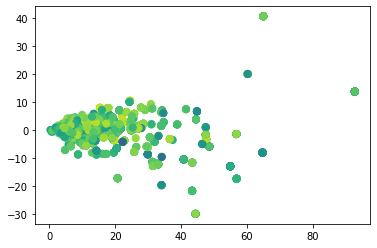

In [44]:
plt.scatter(x=pairwise_input_train[:1000, 0], y=pairwise_input_train[:1000, 8], c=rating_preds_train[:1000], vmin=0, vmax=5, s=50)

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(pairwise_input_train[:1000, :])

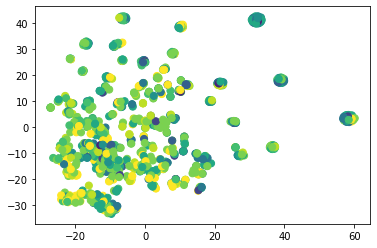

In [46]:
plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=rating_true_train[:1000], vmin=0, vmax=5, s=50)

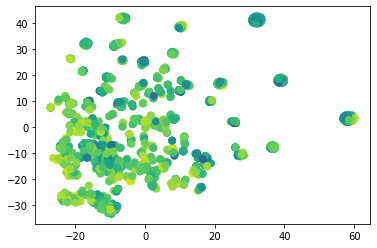

In [47]:
plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=rating_preds_train[:1000], vmin=0, vmax=5, s=50)

# Prediction samples

In [48]:
print("training_ground_truth=", rating_true_train[:20])

training_ground_truth= [4.5 4.  3.5 4.  4.  3.  3.5 5.  5.  3.  3.  4.  4.  3.  3.5 4.  2.  3.5
 3.5 3. ]


In [49]:
print("training_prediction=", np.around(a=rating_preds_train[:20], decimals=1))

training_prediction= [3.3 4.1 3.  4.2 3.5 2.8 4.7 4.4 4.1 2.4 3.2 3.6 4.5 3.9 3.6 4.4 3.1 3.6
 3.1 2.5]


In [50]:
print("validation_ground_truth=", rating_true_valid[:20])

validation_ground_truth= [3.  4.  3.  4.  3.  3.5 4.5 3.5 3.5 3.5 3.  3.5 4.  2.5 5.  5.  5.  2.
 5.  4. ]


In [51]:
print("validation_prediction=", np.around(a=rating_preds_valid[:20], decimals=1))

validation_prediction= [4.2 3.5 2.5 2.5 2.1 3.4 4.2 3.4 3.1 3.7 3.5 2.8 4.2 2.7 4.1 4.4 4.6 3.4
 3.9 4. ]


### When ratings are low

In [52]:
print("training_prediction(2)=", np.around(a=rating_preds_train[rating_true_train == 2][: 20], decimals=1))

training_prediction(2)= [3.1 2.6 2.5 2.3 3.  3.  3.2 2.8 3.  2.6 3.3 1.9 3.2 2.9 3.3 4.2 3.1 3.4
 2.6 3. ]


In [53]:
print("validation_prediction(2)=", np.around(a=rating_preds_valid[rating_true_valid == 2][: 20], decimals=1))

validation_prediction(2)= [3.4 2.9 3.6 2.4 3.3 3.  3.  2.  3.5 2.6 3.1 3.4 3.8 3.2 1.6 2.6 2.3 3.2
 2.9 2.9]
